In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
X = df[['highway-mpg']]
Y = df[['price']]
lm.fit(X, Y)
yhat = lm.predict(X)
yhat[0:5]


array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [7]:
lm.intercept_

array([38423.30585816])

In [8]:
lm.coef_

array([[-821.73337832]])

In [10]:
X = df[["engine-size"]]
lm.fit(X, Y)
lm.predict(X)[:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [11]:
lm.intercept_

array([-7963.33890628])

In [12]:
lm.coef_

array([[166.86001569]])

In [16]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
lm.intercept_

-15806.624626329198

In [17]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

(0, 48295.06184054404)

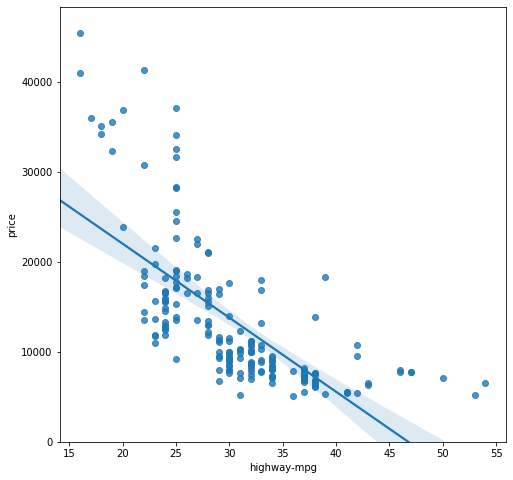

In [20]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8, 8))
sns.regplot(x = "highway-mpg", y="price", data = df)
plt.ylim(0,)

(0, 47425.124162884524)

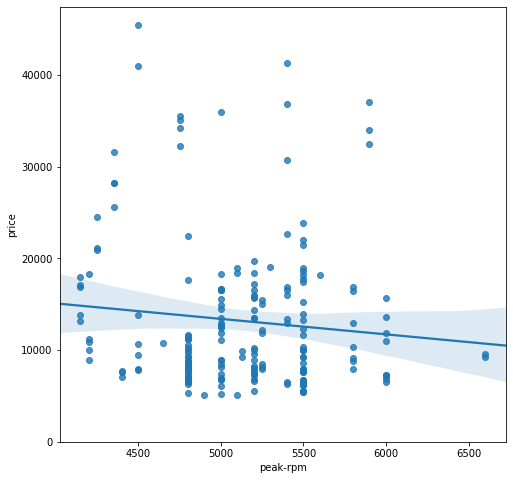

In [21]:
plt.figure(figsize=(8, 8))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [22]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [23]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


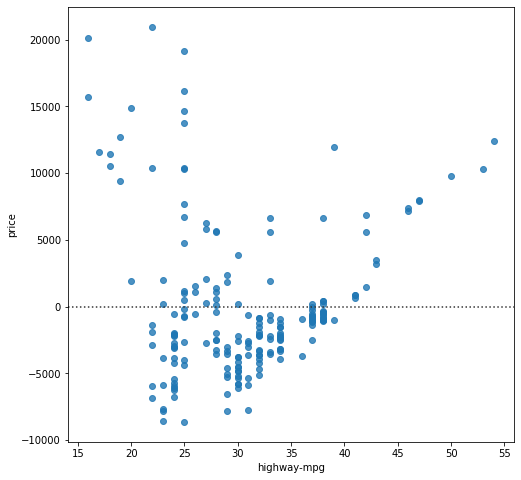

In [28]:
plt.figure(figsize=(8, 8))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

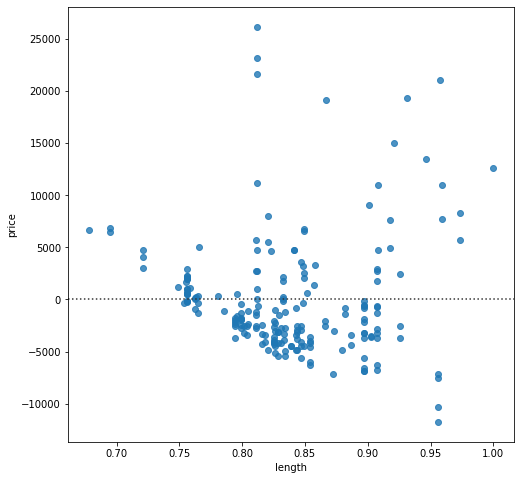

In [27]:
plt.figure(figsize=(8, 8))
sns.residplot(df['length'], df['price'])
plt.show()

Text(0, 0.5, 'Proportion of Cars')

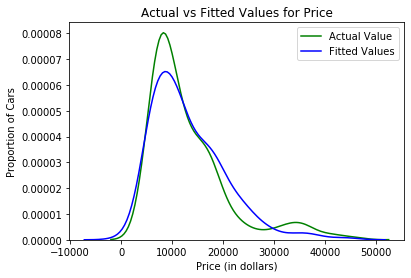

In [34]:
Y_hat = lm.predict(Z)

ax1 = sns.distplot(df['price'], hist=False, color="g", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

In [53]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib')
    
#     ax = plt.gca()
#     ax.set_facecolor((0.898, 0.898, 0.898))
#     fig = plt.gcf()

    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    

In [48]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


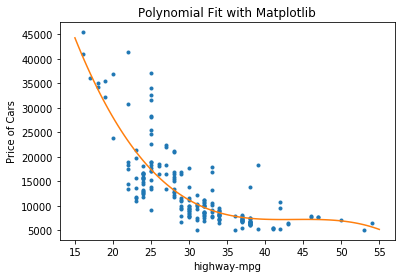

In [54]:
PlotPolly(p, x, y, 'highway-mpg')

In [41]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


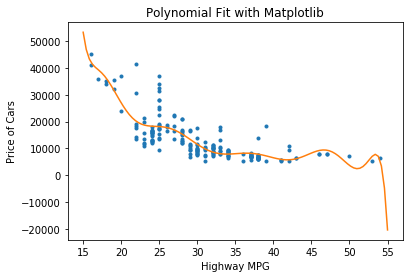

In [55]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [59]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
Z_pr = pr.fit_transform(Z)
Z_pr.shape

(201, 15)

In [60]:
Z.shape

(201, 4)

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()),
       ('polynomial', PolynomialFeatures(include_bias=False)),
       ('model',LinearRegression())
      ]
pipe=Pipeline(Input)
pipe.fit(Z, y)

ypipe = pipe.predict(Z)
ypipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [67]:
Input=[('scale',StandardScaler()),
       ('model',LinearRegression())
      ]

pipe = Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [68]:
lm.fit(X, Y)

print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


In [70]:
Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]]


In [71]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


In [72]:
lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [73]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(
    df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [74]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [75]:
mean_squared_error(df['price'], p(x))

20474146.426361218

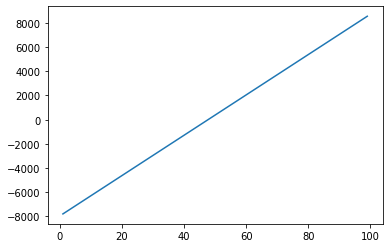

In [77]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
yhat=lm.predict(new_input)
yhat[0:5]
plt.plot(new_input, yhat)
plt.show()